# 下載vgg_face預訓練模型檔

In [2]:
%%bash
cd ../
python download_gdrive.py 1ViZbFQYKqs1IQixLYa2tqUeVLbnxe9sN ./torch/vgg_face_dag.pth
#or
#wget http://www.robots.ox.ac.uk/~albanie/models/pytorch-mcn/vgg_face_dag.pth

553MB [00:05, 99.9MB/s]


# 下載範例數據檔

# 程式開始

In [3]:
! mkdir result model

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from vgg import vggface
from torchvision.models import vgg19
from torchvision.utils import save_image

from dataloader import *
#from model import *
from model_256 import *
from loss import *
from run_utils import *

In [5]:
torch.__version__ 

'1.2.0'

In [7]:
ds = VoxCelebDataset(root='../../et082-group15/data/160/', K=8, size=256)
print(len(ds))

160


In [8]:
data_loader = DataLoader(ds, batch_size=1,shuffle=True,num_workers=0,pin_memory=True)

In [9]:
E = Embedder().cuda()
G = Generator().cuda()
D = Discriminator(num_videos=1067).cuda()

torch.Size([1, 3, 256, 256]) torch.Size([1, 8, 6, 256, 256])
batch_size is 1 !!


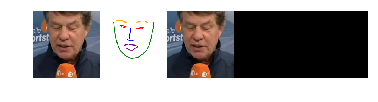

In [10]:
i , source_landmark , target_frame , context = next(iter(data_loader)) 
print( source_landmark.shape, context.shape )
save_n_draw_result(E, G, source_landmark , target_frame , context,
                  save_out_img=False
                   )

In [11]:
optim_EG = optim.Adam(list(E.parameters())+list(G.parameters()) , lr=5e-5)
optim_D = optim.Adam(D.parameters() , lr=2e-4)

0
loss:1.1198, loss_D:268.2107, loss_EG:-267.0909
batch_size is 1 !!


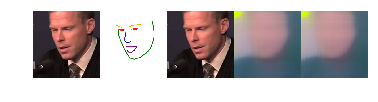

1
loss:1.1233, loss_D:262.3751, loss_EG:-261.2518
batch_size is 1 !!


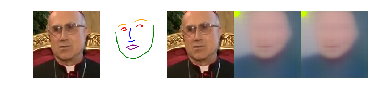

2


KeyboardInterrupt: 

In [15]:
epochs = 100
for epoch in range(epochs):
    print(epoch)
    
    for i , source_landmark , target_frame , context in data_loader:
        
        source_landmark , target_frame , context = source_landmark.cuda() , target_frame.cuda() , context.cuda()
        
        target_frame_, emb , i = train_step(E, G, D, optim_EG, optim_D, i , source_landmark , target_frame , context, 
               update_D_again=False, set_W=True, print_loss=False)
        
    if epoch%1==0 or epoch+1==epochs:
        i , source_landmark , target_frame , context = next(iter(data_loader)) 
        source_landmark , target_frame , context = source_landmark.cuda() , target_frame.cuda() , context.cuda()
        # print loss
        target_frame_, emb , i = train_step(E, G, D, optim_EG, optim_D, i , source_landmark , target_frame , context, 
               update_D_again=False, set_W=False, print_loss=True,
                                           )

        save_n_draw_result(E, G, source_landmark , target_frame , context,
                           save_out_img_path='./result/', 
                           save_out_img_fname=f'{str(epoch).zfill(6)}.jpg'
                          )
    if epoch%5==0 or epoch+1==epochs:
        save_model(E, G, D, save_model_folder="./model/", postfix=str(epoch) )


In [16]:
# 清除資訊
! rm -rf model
! rm -rf result
! rm -rf vgg_face_dag.pth
